In [1]:
versioninfo()

Julia Version 1.5.2
Commit 539f3ce943 (2020-09-23 23:17 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


# Welcome to the Polymake.jl Tutorial
### Some notes so that we're all on the same page
* Polymake is software for all of your discrete geometry needs, it's written in C++/perl
* Oscar (https://oscar.computeralgebra.de/) is written in the julia language
* Polymake.jl is a julia package for using Polymake
* Integrating polymake functions into Oscar is an ongoing project


* What you're looking at now is a jupyter notebook running julia
* You can run everything I am running by just typing 'julia' in your terminal (if you've installed julia) 


Installing julia: https://julialang.org/downloads/

Polymake.jl documentation: https://oscar-system.github.io/Polymake.jl/stable/ 

Arxiv Paper: (Kaluba, Lorenz, Timme) https://arxiv.org/pdf/2003.11381.pdf

Syntax Translation: https://oscar-system.github.io/Polymake.jl/stable/examples/#Polymake-syntax-translation


#### Let's get started!



The first thing we do is load Polymake

In [2]:
# hashtags make comments
# If you've never used polymake before in julia, you should type using Pkg; Pkg.add("Polymake").
#  or you can do this through the package manager in julia in your terminal
using Polymake

polymake version 4.3
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Here's some julia syntax regarding matrices you should know

In [3]:
M=[[1,0,0,0] [1,1,0,0] [1,0,1,0] [1,0,0,1]] # writing the columns of a matrix
M' #taking the transpose
M₁=[1 0 0 0
    1 1 0 0
    1 0 1 0
    1 0 0 1] #julia understands line breaks when constructing matrices
M₂=[1 0 0 0; 1 1 0 0; 1 0 1 0; 1 0 0 1]
M_rows=collect(eachrow(M₂)) 
M_rows[1] #arrays are indexed like this  (FROM 1! not 0 like in Polymake)
M_rows[1]+M_rows[2]
M₁==M₂==M'

true

In [4]:
my_points = M₁ #these are homogeneous coordinates for vertices of a 3-simplex in R^3

4×4 Array{Int64,2}:
 1  0  0  0
 1  1  0  0
 1  0  1  0
 1  0  0  1

In [5]:
const pp=Polymake.polytope
#constructing a polytope lives in the application 'polytope'
P1=Polymake.polytope.Polytope(POINTS=my_points) #constructing a polytope! (try clicking the properties)
pp.Polytope(POINTS=my_points)

type: Polytope<Rational>

POINTS
  1  0  0  0
  1  1  0  0
  1  0  1  0
  1  0  0  1

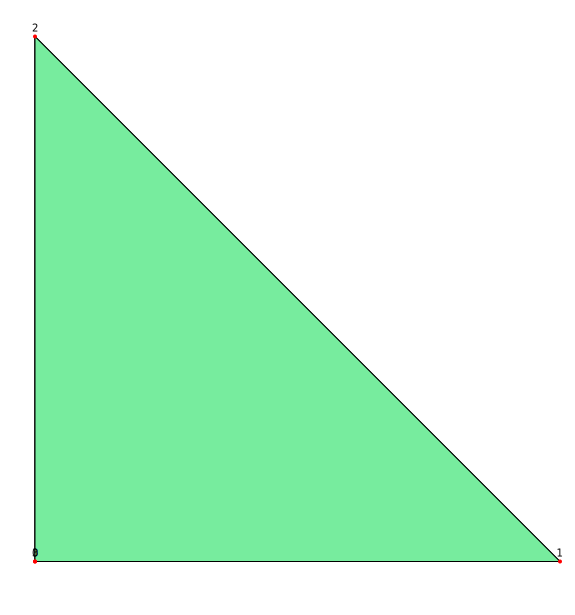

polymake: used package cdd
  cddlib
  Implementation of the double description method of Motzkin et al.
  Copyright by Komei Fukuda.
  http://www-oldurls.inf.ethz.ch/personal/fukudak/cdd_home/

polymake: used package ppl
  The Parma Polyhedra Library ([[wiki:external_software#PPL]]): A C++ library for convex polyhedra
  and other numerical abstractions.
  http://www.cs.unipr.it/ppl/

polymake: used package SVG
   Generated using the Perl SVG Module
   by Ronan Oger



In [6]:
#visual(P1) #note on visual: 3D stuff doesn't work perfectly in a notebook, but it does in the terminal
Polymake.display_svg(P1) #when visualizing non-3D objects, use Polymake.display_svg('Theobject')

In [7]:
P1 #now we have more properties (click them), these can be called by P1.'property'

type: Polytope<Rational>

AFFINE_HULL
	

BOUNDED
	true

COMBINATORIAL_DIM
	3

CONE_AMBIENT_DIM
	4

CONE_DIM
	4

DUAL_GRAPH
	type: Graph<Undirected> as Polytope<Rational>::DUAL_GRAPH

FACETS
  0   1   0   0
  0   0   1   0
  0   0   0   1
  1  -1  -1  -1

FEASIBLE
	true

GRAPH
	type: Graph<Undirected> as Polytope<Rational>::GRAPH

LINEALITY_DIM
	0

LINEALITY_SPACE
	

NEIGHBOR_FACETS_CYCLIC_NORMAL
	1 3 2
	3 0 2
	0 3 1
	0 1 2

N_EDGES
	6

N_POINTS
	4

N_VERTICES
	4

POINTED
	true

POINTS
  1  0  0  0
  1  1  0  0
  1  0  1  0
  1  0  0  1

VERTICES
  1  0  0  0
  1  1  0  0
  1  0  1  0
  1  0  0  1

VERTICES_IN_FACETS
	{0 2 3}
	{0 1 3}
	{0 1 2}
	{1 2 3}

VIF_CYCLIC_NORMAL
	0 3 2
	1 3 0
	0 2 1
	2 3 1

In [8]:
println(P1.VERTICES)
P1.FACETS

pm::Matrix<pm::Rational>
1 0 0 0
1 1 0 0
1 0 1 0
1 0 0 1



pm::Matrix<pm::Rational>
0 1 0 0
0 0 1 0
0 0 0 1
1 -1 -1 -1


In [9]:
println("Here are the facets:\n",(P1.FACETS))
julia_facets=convert(Array{Int64,2},P1.FACETS)
println("Here are the facets as an integer matrix in julia:\n"*string(julia_facets))

Here are the facets:
pm::Matrix<pm::Rational>
0 1 0 0
0 0 1 0
0 0 0 1
1 -1 -1 -1

Here are the facets as an integer matrix in julia:
[0 1 0 0; 0 0 1 0; 0 0 0 1; 1 -1 -1 -1]


Read row $v$ as 

$v_0+v_1 x_1 + v_2 x_2 + \cdots v_n x_n \geq 0$

(note that markdown understands latex)

In [10]:
P1.HASSE_DIAGRAM.FACES

PropertyValue wrapping pm::graph::NodeMap<pm::graph::Directed, pm::Set<long, pm::operations::cmp>>
{}
{0}
{1}
{2}
{3}
{0 1}
{0 2}
{0 3}
{1 2}
{1 3}
{2 3}
{0 2 3}
{0 1 3}
{0 1 2}
{1 2 3}
{0 1 2 3}


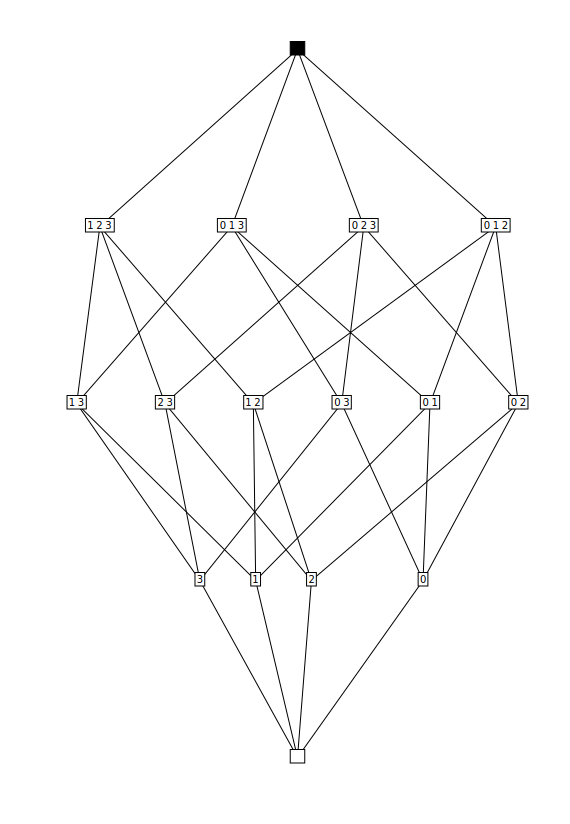

In [11]:
Polymake.display_svg(P1.HASSE_DIAGRAM)
#visual(P1.HASSE_DIAGRAM)

In [12]:
#here is how you access help. it points to the polymake documentation. For syntax translation, see the above link
#note that ?somefunction must be evaluated in it's own 'box' otherwise it won't work.

In [13]:
?polytope.scale;

In [14]:
[polytope.scale(P1,i).N_LATTICE_POINTS for i in 1:10]

10-element Array{Polymake.IntegerAllocated,1}:
   4
  10
  20
  35
  56
  84
 120
 165
 220
 286

In [15]:
Ehrhart_Values=[polytope.scale(P1,i).N_LATTICE_POINTS for i in 1:10]

10-element Array{Polymake.IntegerAllocated,1}:
   4
  10
  20
  35
  56
  84
 120
 165
 220
 286

In [16]:
f=P1.EHRHART_POLYNOMIAL

polymake: used package libnormaliz
  [[wiki:external_software#Normaliz]] is a tool for computations in affine monoids, vector configurations, lattice polytopes, and rational cones.
  Copyright by Winfried Bruns, Bogdan Ichim, Christof Soeger.
  http://www.math.uos.de/normaliz/



PropertyValue wrapping pm::UniPolynomial<pm::Rational, long>
1/6*x^3 + x^2 + 11/6*x + 1

In [17]:
Array{Int64,1}([1//6*x^3+x^2+11//6*x+1 for x in 1:10])

10-element Array{Int64,1}:
   4
  10
  20
  35
  56
  84
 120
 165
 220
 286

In [18]:
#you have to know what application the functions you want live in
F1=fan.normal_fan(P1)

type: PolyhedralFan<Rational>

COMPLETE
	true

FAN_AMBIENT_DIM
	3

FAN_DIM
	3

LINEALITY_SPACE
	

MAXIMAL_CONES
	{0 1 2}
	{1 2 3}
	{0 2 3}
	{0 1 3}

PSEUDO_REGULAR
	true

RAYS
	1 0 0
	0 1 0
	0 0 1
	-1 -1 -1

REGULAR
	true

In [19]:
F1.RAYS #inward facing normals

pm::Matrix<pm::Rational>
1 0 0
0 1 0
0 0 1
-1 -1 -1


In [20]:
F1.FAN_AMBIENT_DIM

3

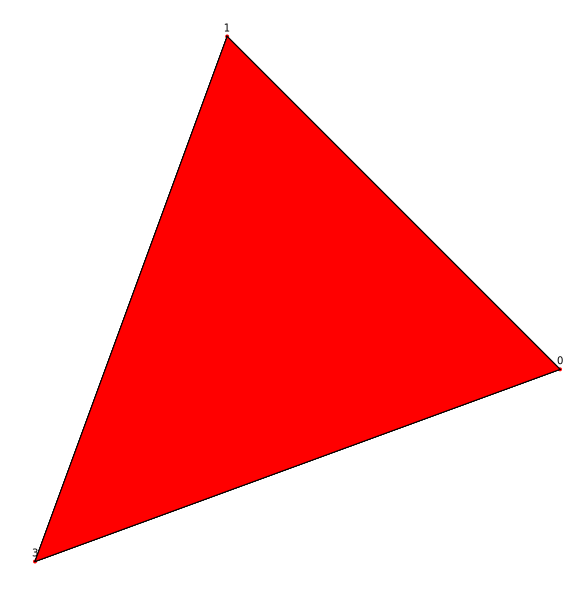

In [21]:
#visual(F1)
Polymake.display_svg(F1)

In [22]:
Q1= polytope.cuboctahedron();

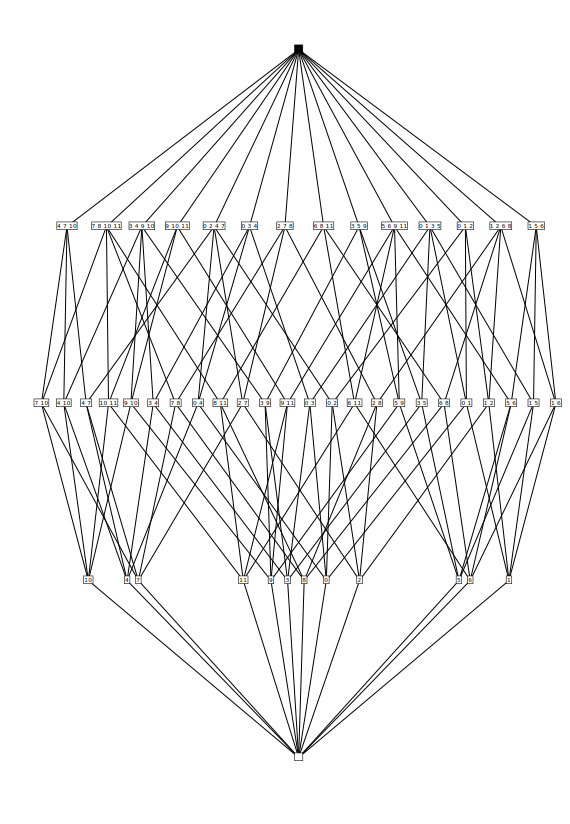

In [23]:
Polymake.display_svg(Q1.HASSE_DIAGRAM)

In [24]:
Q2=polytope.polarize(Q1) #this is my favorite polytope

type: Polytope<Rational>
description: Polytope polarized from

AFFINE_HULL
	

CONE_AMBIENT_DIM
	4

CONE_DIM
	4

FACETS
  1   1   1   0
  1   1   0   1
  1   0   1   1
  1   1   0  -1
  1   0   1  -1
  1   1  -1   0
  1   0  -1   1
  1  -1   1   0
  1  -1   0   1
  1   0  -1  -1
  1  -1   0  -1
  1  -1  -1   0

GROUP
	type: Group as Polytope<Rational>::GROUP

LINEALITY_DIM
	0

LINEALITY_SPACE
	

VERTICES
  1     0    -1     0
  1    -1     0     0
  1   1/2   1/2  -1/2
  1     1     0     0
  1   1/2  -1/2  -1/2
  1     0     1     0
  1   1/2  -1/2   1/2
  1     0     0    -1
  1     0     0     1
  1  -1/2   1/2   1/2
  1   1/2   1/2   1/2
  1  -1/2   1/2  -1/2
  1  -1/2  -1/2   1/2
  1  -1/2  -1/2  -1/2

VERTICES_IN_FACETS
	{0 1 12 13}
	{1 7 11 13}
	{0 4 7 13}
	{1 8 9 12}
	{0 6 8 12}
	{1 5 9 11}
	{2 5 7 11}
	{0 3 4 6}
	{2 3 4 7}
	{5 8 9 10}
	…

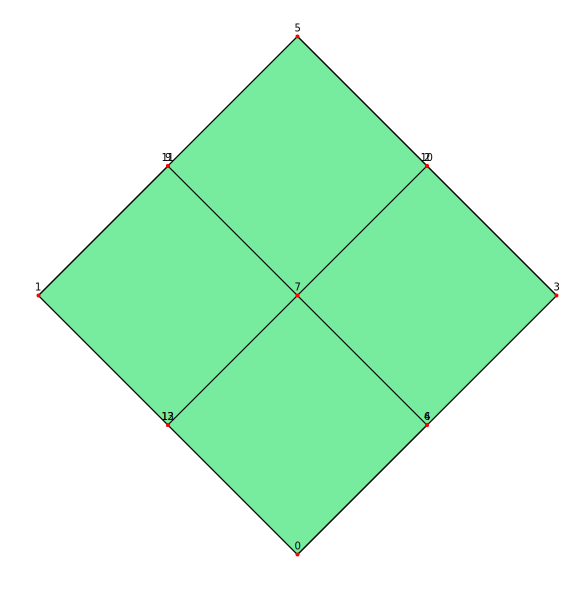

In [25]:
#visual(Q2)
Polymake.display_svg(Q2)

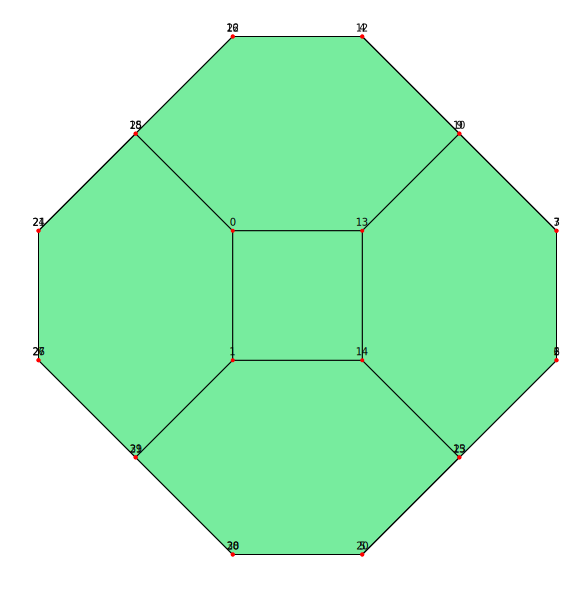

In [26]:
#visual(polytope.intersection(polytope.scale(Q2,5//4),Q1))
Polymake.display_svg(polytope.intersection(polytope.scale(Q2,5//4),Q1))

In [27]:
println(Q2.F_VECTOR,"\n",Q1.F_VECTOR)

pm::Vector<pm::Integer>
14 24 12
pm::Vector<pm::Integer>
12 24 14


In [28]:
Q2.VERTICES
Q2.VERTICES_IN_FACETS #incidence matrix
convert(Array{Bool,2},Q2.VERTICES_IN_FACETS)
Q2.FACETS
Q2.FACETS_THRU_VERTICES

pm::IncidenceMatrix<pm::NonSymmetric>
{0 2 4 7}
{0 1 3 5}
{6 8 11}
{7 8 10 11}
{2 7 8}
{5 6 9 11}
{4 7 10}
{1 2 6 8}
{3 4 9 10}
{3 5 9}
{9 10 11}
{1 5 6}
{0 3 4}
{0 1 2}


In [29]:
R=polytope.minkowski_sum(Q1,Q2)

type: Polytope<Rational>
description: Minkowski sum of 1* and 1*

CONE_AMBIENT_DIM
	4

INPUT_LINEALITY
	

POINTS
  1     1     0     0
  1     0     1     0
  1   3/2   3/2  -1/2
  1     2     1     0
  1   3/2   1/2  -1/2
  1     1     2     0
  1   3/2   1/2   1/2
  1     1     1    -1
  1     1     1     1
  1   1/2   3/2   1/2
  1   3/2   3/2   1/2
  1   1/2   3/2  -1/2
  1   1/2   1/2   1/2
  ⋮              
  1  -1/2  -1/2  -1/2
  1     0    -1     0
  1  -1/2  -3/2  -1/2
  1    -1     0     0
  1  -1/2  -3/2   1/2
  1    -1    -1    -1
  1    -1    -1     1
  1  -3/2  -1/2   1/2
  1  -1/2  -1/2   1/2
  1  -3/2  -1/2  -1/2
  1  -3/2  -3/2   1/2
  1  -3/2  -3/2  -1/2

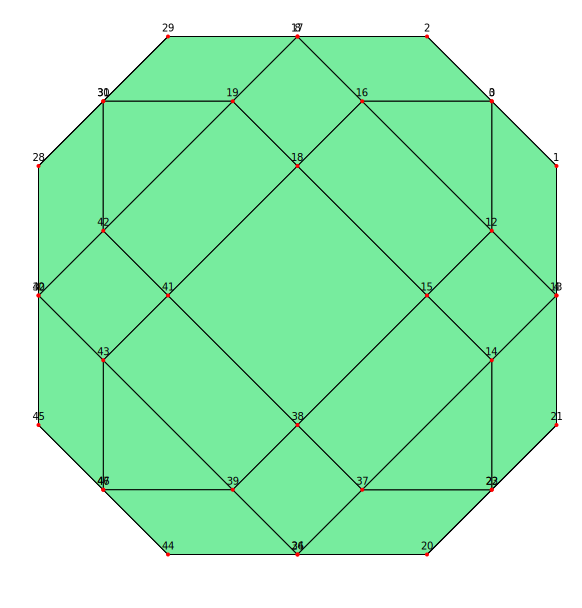

In [30]:
#visual(R)
Polymake.display_svg(R)

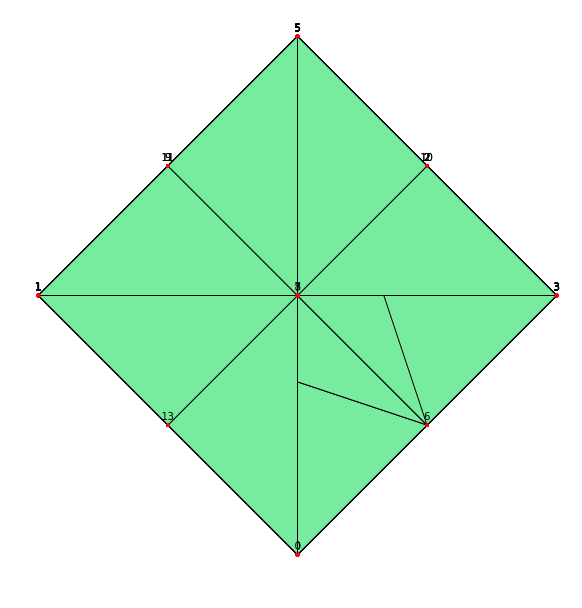

In [31]:
#visual(Q2.TRIANGULATION)
Polymake.display_svg(Q2.TRIANGULATION)

Another nice thing about using julia is you can use other packages and have them interact with polymake 

In [32]:
using Plots

In [33]:
n_polytopes=1000
in_dimension=4
q=polytope.rand_normal(3,6).VERTICES[1,:]# 6 pts on sphere in R^3
FacetCounts=[]
for i in 1:n_polytopes
    P=polytope.rand_normal(in_dimension,50)
    push!(FacetCounts,P.N_FACETS)
end


polymake: used package lrs
  Implementation of the reverse search algorithm of Avis and Fukuda.
  Copyright by David Avis.
  http://cgm.cs.mcgill.ca/~avis/C/lrs.html



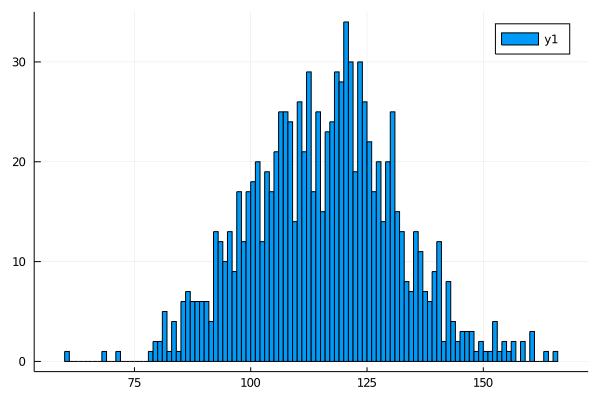

In [34]:
histogram(FacetCounts,bins=max(FacetCounts...))

Some tropical stuff

In [35]:
C=[1,2,1,4]
E=P1.VERTICES
T1=@pm tropical.Hypersurface{Min}(COEFFICIENTS=C, MONOMIALS=E)

type: Hypersurface<Min>

COEFFICIENTS
	1 2 1 4

MONOMIALS
	1 0 0 0
	1 1 0 0
	1 0 1 0
	1 0 0 1

In [36]:
#visual(T1)
Polymake.display_svg(T1)

polymake: used package atint
  [[wiki:external_software#a-tint]] is an extension for tropical intersection theory.
  (C) 2011 - 2015 Simon Hampe, simon.hampe@googlemail.com
  See also: https://github.com/simonhampe/atint 


In [37]:
T2=@pm tropical.Hypersurface{Min}(COEFFICIENTS=[rand(1:10) for i in 1:Q1.N_VERTICES],MONOMIALS = Q1.VERTICES)

type: Hypersurface<Min>

COEFFICIENTS
	7 6 10 7 4 9 8 6 6 4 7 4

MONOMIALS
	1 1 1 0
	1 1 0 1
	1 0 1 1
	1 1 0 -1
	1 0 1 -1
	1 1 -1 0
	1 0 -1 1
	1 -1 1 0
	1 -1 0 1
	1 0 -1 -1
	…

In [38]:
#visual(T2)
Polymake.display_svg(T2)

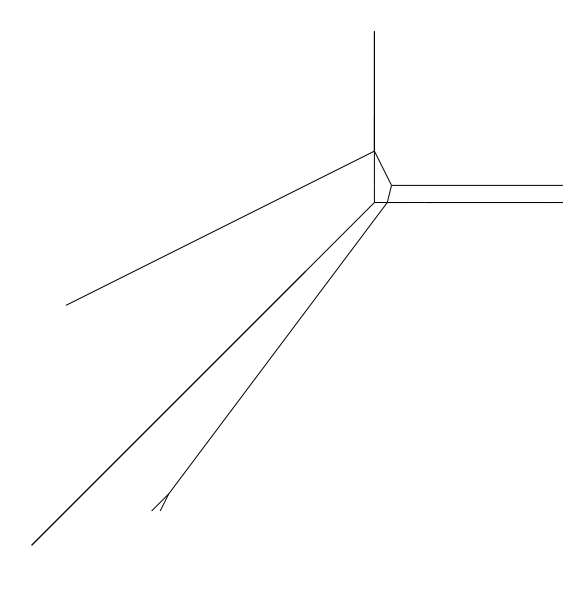

In [42]:
#visual(Polymake.tropical.intersect(T1,T2))
Polymake.display_svg(Polymake.tropical.intersect(T1,T2))

Some matroid stuff

In [40]:
M=matroid.f8_matroid()
M.BASES
G=M.AUTOMORPHISM_GROUP

G.ORDER
G.CONJUGACY_CLASS_SIZES

polymake: used package bliss
  [[wiki:external_software#bliss]] is a software for computation of automorphism groups of graphs.
  Copyright by Tommi Junttila and Petteri Kaski.
  http://www.tcs.hut.fi/Software/bliss/
polymake: used package permlib
  A callable C++ library for permutation computations. 
  Written by Thomas Rehn.
  http://www.math.uni-rostock.de/~rehn/software/permlib.html 



pm::Array<long>
1 2 1 2 2 2 2 1 2 1

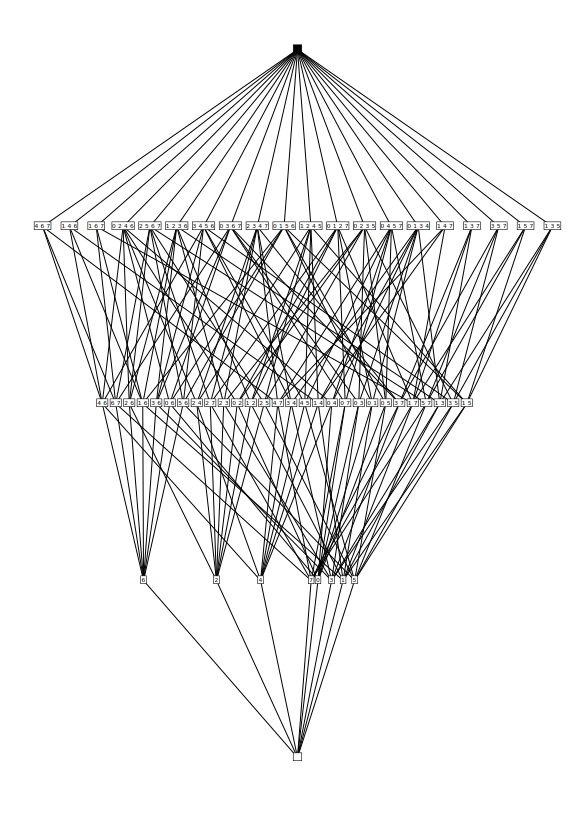

In [41]:
Polymake.display_svg(M.LATTICE_OF_FLATS)